In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chat-bot/simple
/kaggle/input/chat-bot/model6.h5
/kaggle/input/chat-bot/moby_dick_four_chapters.txt
/kaggle/input/chat-bot/test_qa.txt
/kaggle/input/chat-bot/epochBIG
/kaggle/input/chat-bot/epoch250
/kaggle/input/chat-bot/chatbot_10.h5
/kaggle/input/chat-bot/train_qa.txt
/kaggle/input/chat-bot/myfirstmodel.h5
/kaggle/input/chat-bot/iris.csv
/kaggle/input/chat-bot/chatbot_120_epochs.h5
/kaggle/input/chat-bot/melville-moby_dick.txt
/kaggle/input/chat-bot/epochBIG.h5
/kaggle/input/chat-bot/epoch250.h5
/kaggle/input/chat-bot/simple.h5


In [4]:
import pickle
import numpy as np

In [5]:
with open("/kaggle/input/chat-bot/train_qa.txt","rb") as  fp:
    train_data = pickle.load(fp)

In [6]:
with open("/kaggle/input/chat-bot/test_qa.txt","rb") as  fp:
    test_data = pickle.load(fp)

In [7]:
type(test_data)

list

In [8]:
type(train_data)

list

In [9]:
len(train_data)

10000

In [10]:
len(test_data)

1000

In [13]:
test_data[0][2]

'no'

In [14]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [15]:
vocab =set()

In [16]:
all_data = test_data + train_data

In [17]:
len(all_data)

11000

In [18]:
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [19]:
vocab.add("no")
vocab.add("yes")

In [20]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [21]:
len(vocab)

37

In [22]:
vocab_len = len(vocab) + 1

In [23]:
vocab_len

38

In [24]:
max_story_len = max([len(data[0]) for data in all_data])

In [25]:
max_question_len = max([len(data[1]) for data in all_data])

In [26]:
print(max_story_len)
print(max_question_len)

156
6


In [27]:
# Vectorizing the Data

In [28]:
vocab_size = len(vocab) + 1

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [30]:
# integer encode sequences of words


In [31]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [32]:
tokenizer.word_index

{'got': 1,
 'back': 2,
 'picked': 3,
 'the': 4,
 'apple': 5,
 'up': 6,
 'left': 7,
 'journeyed': 8,
 'there': 9,
 '.': 10,
 'sandra': 11,
 'office': 12,
 'discarded': 13,
 'in': 14,
 'dropped': 15,
 'yes': 16,
 'bedroom': 17,
 'went': 18,
 'kitchen': 19,
 'travelled': 20,
 '?': 21,
 'no': 22,
 'mary': 23,
 'put': 24,
 'moved': 25,
 'took': 26,
 'grabbed': 27,
 'is': 28,
 'john': 29,
 'garden': 30,
 'down': 31,
 'football': 32,
 'to': 33,
 'bathroom': 34,
 'daniel': 35,
 'hallway': 36,
 'milk': 37}

In [33]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [34]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [55]:
# train_story_seq

In [35]:
len(train_story_seq)

10000

In [56]:
### Functionalize Vectorization

In [36]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [37]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [38]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [39]:
inputs_test

array([[ 0,  0,  0, ...,  4, 17, 10],
       [ 0,  0,  0, ...,  4, 30, 10],
       [ 0,  0,  0, ...,  4, 30, 10],
       ...,
       [ 0,  0,  0, ...,  4,  5, 10],
       [ 0,  0,  0, ...,  4, 30, 10],
       [ 0,  0,  0, ...,  5,  9, 10]], dtype=int32)

In [40]:
queries_test

array([[28, 29, 14,  4, 19, 21],
       [28, 29, 14,  4, 19, 21],
       [28, 29, 14,  4, 30, 21],
       ...,
       [28, 23, 14,  4, 17, 21],
       [28, 11, 14,  4, 30, 21],
       [28, 23, 14,  4, 30, 21]], dtype=int32)

In [41]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,
       503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [43]:
tokenizer.word_index['yes']

16

In [44]:
tokenizer.word_index['no']

22

In [46]:
#Creating the model

In [56]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [60]:
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense,Dropout,Input,Activation,Permute
from tensorflow.keras.layers import add,dot,concatenate
from tensorflow.keras.layers import LSTM

In [61]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [62]:
#encoder

In [63]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

In [64]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

In [65]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [66]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [69]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [70]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [71]:
answer = concatenate([response, question_encoded])

In [72]:
answer

<KerasTensor shape=(None, 6, 220), dtype=float32, sparse=False, name=keras_tensor_18>

In [73]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [74]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [75]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 156)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 156, 64)   │      2,432 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 6, 64)     │      2,432 │ input_layer_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 156, 6)    │          0 │ sequential[0][0], │
│                     │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 156, 6)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 156, 6)    │        228 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 156, 6)    │          0 │ activation[0][0], │
│                     │                   │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 6, 156)    │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 6, 220)    │          0 │ permute[0][0],    │
│ (Concatenate)       │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 32)        │     32,384 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 38)        │      1,254 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 38)        │          0 │ dense[0][0]       │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,730 (151.29 KB)

 Trainable params: 38,730 (151.29 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4827 - loss: 1.2260 - val_accuracy: 0.4970 - val_loss: 0.6953
Epoch 2/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4868 - loss: 0.7102 - val_accuracy: 0.5030 - val_loss: 0.6992
Epoch 3/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5010 - loss: 0.7000 - val_accuracy: 0.4970 - val_loss: 0.6951
Epoch 4/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5024 - loss: 0.6963 - val_accuracy: 0.5030 - val_loss: 0.6956
Epoch 5/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4973 - loss: 0.6961 - val_accuracy: 0.4970 - val_loss: 0.6936
Epoch 6/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4984 - loss: 0.6956 - val_accuracy: 0.5030 - val_loss: 0.6934
Epoch 7/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5052 - loss: 0.6954 - val_accuracy: 0.5030 - val_loss: 0.6932
Epoch 8/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4978 - loss: 0.6956 - 

In [81]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

In [82]:
#Evaluating the model

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


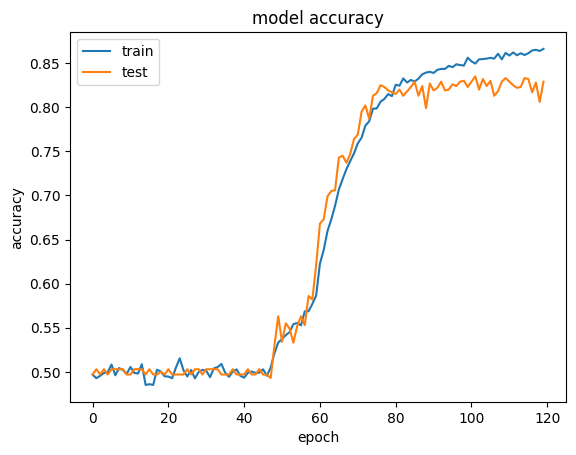

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [91]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [93]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [92]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [94]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [95]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9953884


In [96]:
# writing our own story and questions

In [97]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [98]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [99]:
my_question = "Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [100]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [101]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [102]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [103]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9784298
